## Build Adjacency matrix graph with the approach 


Try a simple iterative non-vectorised approach. D. didn't know what was happening, but need to do iterative anyway - so just try efficient iterative approach here and see how efficient it is

Otherwise extend it further with another approach.

Seems from edge list is the best approach, but you just did it wrong with the wrong prompting!!

Shouldn't be so sparse - as they've shown it!!

#### Note important

It is important to re-query the data tables to get the full years worth of data.


#### Approaches

1. First try to experiment with the existing data, and then extend it to more years.

Current graph data is correct, just need to use a different workflow, 

Incorrect way was done with not recognising the data is in `edge list format`, now you do!

# 2. Review how to create graph adjacency matrices statistics for each year

1. Create the graphs by year
1. Create graph statistics by Director IDs 
1. Link Company IDs based on adjacency matrices
1. Take averages by year company id, and then link everything back

In [76]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
pd.set_option('display.max_columns', None)

In [77]:
file_path = "../2.Initial_Graph_Building/boardex_us_companies_full_data_2022_2024.csv"

boardex_data = pd.read_csv(file_path, index_col = 0)

# Display the first few rows of the data to understand its structure
boardex_data.head()

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,companyid,directorid,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,Gladius Pharmaceuticals Inc,Doctor Steve Gilman,2020,Curr,Independent Director (Brd) (SD),Scientific Advisor (Non-Brd),Private,401.0,2734400.0,601453.0,Independent Director,Brd,SD,2020,NaN,2015-01-06,NaN,NaN,NaN,Quoted
1,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,ContraFect Corp,Doctor Steve Gilman,2023,Curr,Independent Director (Brd) (SD),Independent Vice Chairman (Brd) (SD),Private,401.0,3700766.0,601453.0,Independent Director,Brd,SD,2023,NaN,2015-01-06,NaN,2023-11-09,NaN,Quoted
2,Other,VERICEL CORP (Aastrom Biosciences Inc prior to...,Northeastern University,Doctor Steve Gilman,2016,Curr,Independent Director (Brd) (SD),Advisory Board Member,Universities,401.0,61472.0,601453.0,Independent Director,Brd,SD,2016,NaN,2015-01-06,NaN,NaN,NaN,Quoted
3,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,AKEBIA THERAPEUTICS INC,Doctor Steve Gilman,2018,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,2055831.0,601453.0,Independent Director,Brd,SD,2018,NaN,2015-01-06,NaN,2018-12-12,NaN,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,SCYNEXIS INC,Doctor Steve Gilman,2015,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,2065362.0,601453.0,Independent Director,Brd,SD,2015,NaN,2015-01-06,NaN,2015-02-25,NaN,Quoted


In [78]:
boardex_data.columns

Index(['associationtype', 'boardname', 'companyname', 'directorname',
       'overlapyearstart', 'overlapyearend', 'role', 'associatedrole',
       'conncompanyorgtype', 'boardid', 'companyid', 'directorid', 'roletitle',
       'roleboardposition', 'roleedflag', 'overlapyearstart_int',
       'overlapyearend_int', 'startcompanydatestartrole',
       'startcompanydateendrole', 'conncompanydatestartrole',
       'conncompanydateendrole', 'orgtype'],
      dtype='object')

Watch out for the column details here that's it. Ignore the other metrics later.

In [79]:
filtered_data_df = boardex_data[['boardid', 'companyid', 'directorid', 'overlapyearstart', 'overlapyearend' ]].drop_duplicates()

In [80]:
filtered_data_df['overlapyearend'].replace("Curr", 2024)
filtered_data_df['overlapyearstart'] = pd.to_numeric(filtered_data_df['overlapyearstart'], errors='coerce')
filtered_data_df['overlapyearend'] = pd.to_numeric(filtered_data_df['overlapyearend'], errors='coerce')

### Build Board graph (company interlock)

Here we build the graph with networkx and visualise the results

If this works we can then create an edge list for 

In [81]:
simplified_boardex_df = filtered_data_df.copy()

In [82]:
year = 2022

In [87]:
graph_simplified_df = simplified_boardex_df[ (year >= simplified_boardex_df['overlapyearstart']) & (year < simplified_boardex_df['overlapyearend'])] # less as otherwise overlap to next year


In [95]:
# above will fix the overlap issue - make sure to this!!

In [96]:
graph_simplified_df.sort_values(["boardid", "companyid"]).head()

,boardid,companyid,directorid,overlapyearstart,overlapyearend
45,401.0,462825.0,2119563.0,2022,2024.0
8,401.0,2129204.0,601453.0,2022,2023.0
41,401.0,3179994.0,1330373.0,2021,2023.0
33,401.0,3347021.0,323007.0,2022,2023.0
98,569.0,23423.0,2535310.0,2022,2023.0


In [89]:
# this really fast - so more graphs it should still be fine - try it after!!

In [90]:
# can use gpu supported output here if needed later

# https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

In [91]:
G = nx.from_pandas_edgelist(graph_simplified_df, 'boardid', 'companyid', edge_attr='directorid')

# Generate Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G)

In [92]:
adj_matrix.todense().shape

(8967, 8967)

In [94]:
set(adj_matrix.todense().flatten())

{0, 1}

Generate graph statistics 

**N.b. Create other graph statistics afterwards with other models**

Also use other more efficient parallelised libraries to try calculating the relevant graph statististics afterwards

In [36]:
graph_density = nx.density(G) # create as a graph statistic detail

graph_density # still quite sparse unfortunately - try to visualise the graph here.

# few connections per node but doesn't mean that the graph itself is sparse.

0.0003309176505775275

In [21]:
# get the dictionary of director ids with relevant statistics
clustering_dict = nx.clustering(G)
degree_centrality_dict = nx.degree_centrality(G)

In [ ]:
# betweenness_centrality_dict = nx.betweenness_centrality(G)

# df1 = pd.DataFrame.from_dict(clustering_dict, orient='index', columns=['local_clustering_coef'])
# df2 = pd.DataFrame.from_dict(degree_centrality_dict, orient='index', columns=['degree_centrality'])
# df3 = pd.DataFrame.from_dict(betweenness_centrality_dict, orient='index', columns=['betweenness_centrality'])

### Visualise the graphs

Visualise the output to see what the problem is, now that you know this isn't the major problem here.


Now seems to be more connected - so this could be useful for analysis.


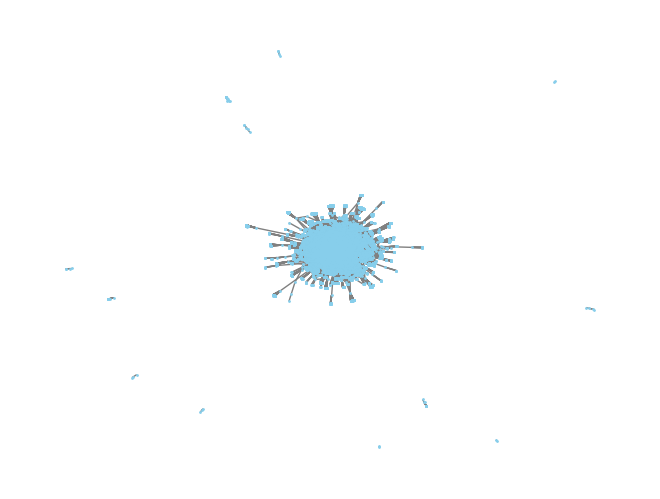

In [35]:
# take about 2 - 3 minutes to create the graph to draw but it is fine

# G = nx.from_pandas_adjacency(adj_matrix) # use adjacency matrix for use later for a function

# layout takes more time - check details for all these - and check it - ask for other workflow

pos = nx.spring_layout(G
                       
                       #, k=0.1 # edit k to zoom in
                       )

# pos = nx.circular_layout(G)

nx.draw(G, pos, #ax=ax, 
        with_labels=False, 
    node_color='skyblue', edge_color='gray', node_size=1, font_size=10)

In [24]:
# from pyvis.network import Network

In [31]:
# # Create a PyVis network
# net = Network(notebook=False)

# G = nx.relabel_nodes(G, {i: str(i) for i in G.nodes()})

# net.from_nx(G)

# # Customize the appearance of the network
# net.repulsion(node_distance=100, central_gravity=0.3, spring_length=100, spring_strength=0.05, damping=0.09)

# # Generate the network graph HTML file
# output_file = "network.html"
# net.save_graph(output_file) # doesn't take too long - so can just use this to run the workflow needed!!

#### Checking

Check the details on graph statistics. It doesn't seem like it matches up.

Graph statistics, with nodes - even if every connection, does that mean it is well connected but sparse - look at the interpretation here!!

### Next steps

Depending on the requirements, you can also just build the graph statistics for directors

You can build the graph for directors - like what you've seen before, to build statistics at the director level, and then research 

Build the graph data below for board director interlocks with director interlock graph as well.

Although the data would be more difficult to interpret there, however the graph network structure should be easy to create!!

Then on the weekend try the graph libraries to build the graph statistics.

And try seed word and feature generation.

Then review the different regression models, and model selection techniques.

Then review the measures of quality after

Also look at more general industries - maybe can deal with graph statistics better!!

#### Important

The visualisation isn't enough - need to check the graph statistics also!!

https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout

**Easy to run and explore the data statistics for graph outside of the visualisation**

Spend some more time and keep up the pace in the next few days! Relatively easy and now know what you're doing based on Nick's feedback.

And code for doing so is fine.

Ran for one year, can do it for multiple years with networkx even though iterative, same for the grpah statistics, once you convert it into an adjacency matrix!!

### Create Director level interlocks

In [37]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
pd.set_option('display.max_columns', None)

In [50]:
file_path = "initial_data/boardex_individual_level_networks.csv"

individual_boardex_data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
individual_boardex_data.head()

,Associationtype,Dirbrdname,Companyname,Directorname,Overlapyearstart,Overlapyearend,Role,Associatedrole,Orgtype,Dirbrdid,Companyid,Directorid,Roletitle,Roleboardposition,Roleedflag,Associatedroletitle,Associatedroleboardposition,Associatedroleedflag,Overlapyearstart_int,Overlapyearend_int
0,Listed Org,Paul Davis,PREMD INC (IMI International Medical Innovatio...,Ron Hosking,2008,2008,Director - SD (Brd) (SD),CFO/VP - Finance (Non-Brd),Quoted,1000002,15646,1657685,Director - SD,Brd,SD,CFO/VP - Finance,Non-Brd,NaN,2008,2008.0
1,Listed Org,Paul Davis,HANFENG EVERGREEN INC (De-listed 06/2014),Paul Begin,2009,2011,Independent Director (Brd) (SD),CFO/Corporate Secretary (Non-Brd),Quoted,1000002,731879,1090836,Independent Director,Brd,SD,CFO/Corporate Secretary,Non-Brd,NaN,2009,2011.0
2,Listed Org,Paul Davis,HANFENG EVERGREEN INC (De-listed 06/2014),Loudon Owen,2011,2011,Independent Director (Brd) (SD),Chairman (Brd) (SD),Quoted,1000002,731879,1110430,Independent Director,Brd,SD,Chairman,Brd,SD,2011,2011.0
3,Listed Org,Paul Davis,HANFENG EVERGREEN INC (De-listed 06/2014),David Reburn,2009,2009,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,1000002,731879,730931,Independent Director,Brd,SD,Independent Director,Brd,SD,2009,2009.0
4,Listed Org,Paul Davis,HANFENG EVERGREEN INC (De-listed 06/2014),Joanne Yan,2009,2011,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,1000002,731879,730934,Independent Director,Brd,SD,Independent Director,Brd,SD,2009,2011.0


In [51]:
individual_boardex_data.columns # look at the top 3 id title

Index(['Associationtype', 'Dirbrdname', 'Companyname', 'Directorname',
       'Overlapyearstart', 'Overlapyearend', 'Role', 'Associatedrole',
       'Orgtype', 'Dirbrdid', 'Companyid', 'Directorid', 'Roletitle',
       'Roleboardposition', 'Roleedflag', 'Associatedroletitle',
       'Associatedroleboardposition', 'Associatedroleedflag',
       'Overlapyearstart_int', 'Overlapyearend_int'],
      dtype='object')

Watch out for the column details here that's it. Ignore the other metrics later.

In [52]:
individual_filtered_data_df = individual_boardex_data[['Dirbrdid','Companyid', 'Directorid', 'Overlapyearstart','Overlapyearend' ]].drop_duplicates()

# try to link it with the director id

In [53]:
individual_filtered_data_df['Overlapyearend'].replace("Curr", 2024)
individual_filtered_data_df['Overlapyearend'] = pd.to_numeric(individual_filtered_data_df['Overlapyearend'], errors='coerce')

### Build Board graph (company interlock)

Here we build the graph with networkx and visualise the results

If this works we can then create an edge list for 

In [54]:
simplified_boardex_df = individual_filtered_data_df.copy()

In [55]:
# year = 2022 # change years and functions

In [56]:
graph_simplified_df = simplified_boardex_df#[ (year >= simplified_boardex_df['overlapyearstart']) & (year <= simplified_boardex_df['overlapyearend'])]


In [57]:
graph_simplified_df.head()

,Dirbrdid,Companyid,Directorid,Overlapyearstart,Overlapyearend
0,1000002,15646,1657685,2008,2008.0
1,1000002,731879,1090836,2009,2011.0
2,1000002,731879,1110430,2011,2011.0
3,1000002,731879,730931,2009,2009.0
4,1000002,731879,730934,2009,2011.0


In [58]:
# this really fast - so more graphs it should still be fine - try it after!!

In [60]:
# 'Dirbrdid','Companyid', 'Directorid'

G = nx.from_pandas_edgelist(graph_simplified_df, 'Dirbrdid', 'Directorid', edge_attr='Companyid')

# Generate Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G)

# can create the graph, now see how to match the graph id details 

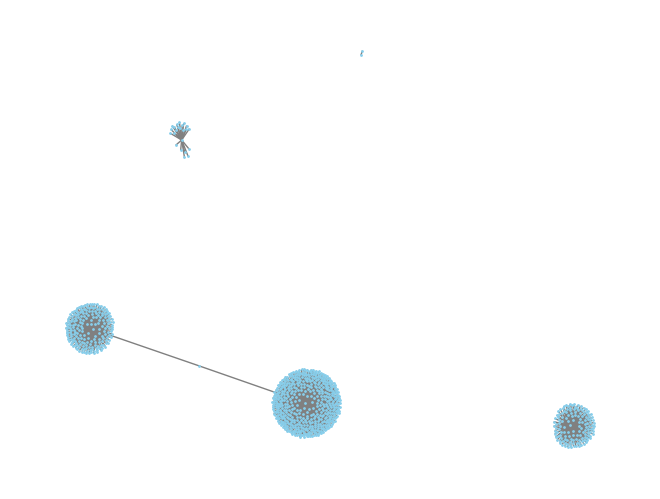

In [61]:
pos = nx.spring_layout(G
                       
                       #, k=0.1 # edit k to zoom in
                       )

# pos = nx.circular_layout(G)

nx.draw(G, pos, #ax=ax, 
        with_labels=False, 
    node_color='skyblue', edge_color='gray', node_size=1, font_size=10)

In [ ]:
# see data has meaningful connections - so we can use this!!

# get and combine the features tomorrow, to get the full workflow!!

Got the two names and ids

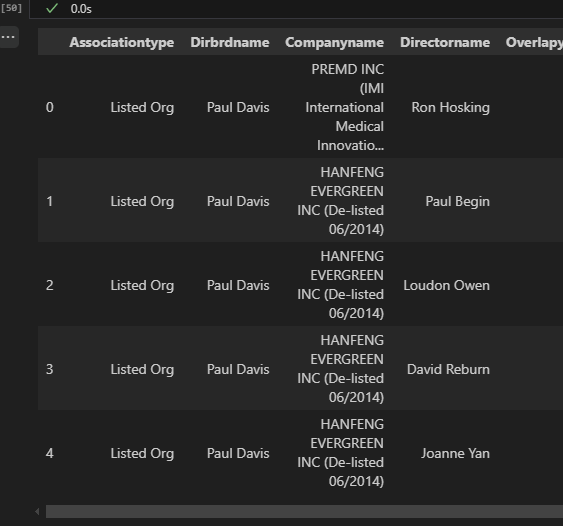

join with another table, rather than what exists here, otherwise it is a bit confusing!

Title meaning - original interpretation you had was wrong, you actually have two titles linked together

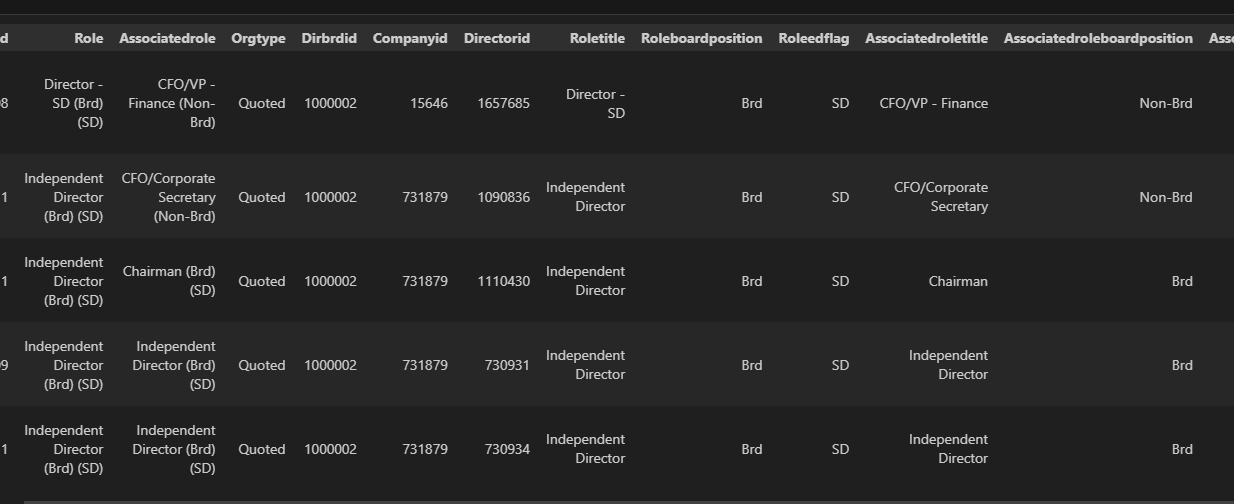

The regular non-lined roles relate to the starting director, and then anything associated has to do with the associated director that's it!!

As seen in the data dictionary, especially if you have a look at the associated section here.

https://wrds-www.wharton.upenn.edu/pages/get-data/boardex/boardex-north-america/networks-associations/individual-networks/

LLM and yourself made this mistake!!

The network structure is meaningful which can be used to create clusters.

In [104]:
import pandas as pd

# Sample DataFrame
data = {
    'boardid': [1, 1, 2, 2, 3],
    'companyid': ['A', 'A', 'B', 'B', 'C'],
    'directorid': ['D1', 'D2', 'D1', 'D3', 'D4']
}
df = pd.DataFrame(data)

# Aggregate to count unique directors
agg_df = df.groupby(['boardid', 'companyid']).directorid.nunique().reset_index()
agg_df.rename(columns={'directorid': 'connections'}, inplace=True)

In [105]:
import networkx as nx

# Create a graph with the number of connections as edge attribute
G = nx.from_pandas_edgelist(agg_df, 'boardid', 'companyid', edge_attr='connections')

In [106]:
adj_matrix = nx.adjacency_matrix(G, weight = "connections") # possible - just preprocess the data to get this.

set(adj_matrix.todense().flatten())

{0, 1, 2}

In [107]:
G.nodes()

NodeView((1, 'A', 2, 'B', 3, 'C'))

In [108]:
df = pd.DataFrame(adj_matrix.todense(), index=G.nodes(), columns=G.nodes())
df

,1,A,2,B,3,C
1,0,2,0,0,0,0
A,2,0,0,0,0,0
2,0,0,0,2,0,0
B,0,0,2,0,0,0
3,0,0,0,0,0,1
C,0,0,0,0,1,0


In [109]:
# get the boardex data get what you need.

In [111]:
G.nodes() # get information on each director, and link it back, centrality and edge information as features separately

# either from the director graph - or just look at the bi-partite approach - only linking to each director, as seen from the final created graph

NodeView((1, 'A', 2, 'B', 3, 'C'))

In [ ]:
# bipartite thing, is just not really something interesting, just doing explaining connections. Just making it sound smart.

# can't do all of it here., and then just adding director specific informatoin here that's it!! For each director.

# essentially just takeing the director information and then looking at the individual companies of interest.

#### To do : Graph clusters

Can use the existing company data interlock to create the meaningful clusters, and from the clusters to get internal statistics, and see if it is useful.

See LLM for how to do this.